### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

#

# Linear regression using Python
Investigation about the possible relationships between the loyalty points, age, remuneration, and spending scores.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe().round(2)

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,39.49,48.08,50.00,1578.03,4320.52
std,13.57,23.12,26.09,1283.24,3148.94
min,17.00,12.30,1.00,25.00,107.00
25%,29.00,30.34,32.00,772.00,1589.25
50%,38.00,47.15,50.00,1276.00,3624.00
75%,49.00,63.96,73.00,1751.25,6654.00
max,72.00,112.34,99.00,6847.00,11086.00


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)  

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 
                                  'spending_score (1-100)': 'spending_score'})

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('clean_reviews.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('clean_reviews.csv')

# View DataFrame
reviews

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [10]:
print(reviews.info())

reviews.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,age,remuneration,spending_score,loyalty_points,product
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,39.49,48.08,50.00,1578.03,4320.52
std,13.57,23.12,26.09,1283.24,3148.94
min,17.00,12.30,1.00,25.00,107.00
25%,29.00,30.34,32.00,772.00,1589.25
50%,38.00,47.15,50.00,1276.00,3624.00
75%,49.00,63.96,73.00,1751.25,6654.00
max,72.00,112.34,99.00,6847.00,11086.00


In [11]:
# Determine correlation
reviews.corr() 

,age,remuneration,spending_score,loyalty_points,product
age,1.000000,-0.005708,-0.224334,-0.042445,0.003081
remuneration,-0.005708,1.000000,0.005612,0.616065,0.305309
spending_score,-0.224334,0.005612,1.000000,0.672310,-0.001649
loyalty_points,-0.042445,0.616065,0.672310,1.000000,0.183600
product,0.003081,0.305309,-0.001649,0.183600,1.000000


>From the table is possible to see that the variable with the strongest correlation with loyalty points are remuneration and spending score. This is a positive correlation.Loyalty points and age have a small negative correlation.

## 5. Linear regression

### 5a) spending vs loyalty

In [12]:
# Independent variable.
x = reviews['spending_score'] 

# Dependent variable.
y = reviews['loyalty_points'] 

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        16:59:32   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * x

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

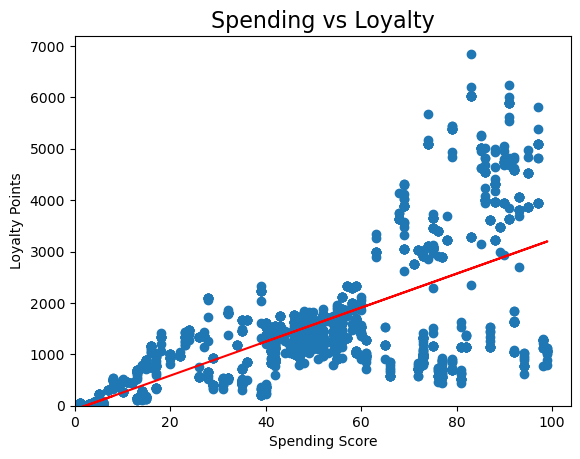

In [15]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set title.
plt.title('Spending vs Loyalty', fontsize=16)

# Add axis labels.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# Save the plot.
plt.savefig('plot1.png')

# View the plot.
plt.show()

### 5b) remuneration vs loyalty

In [16]:
# Independent variable.
x = reviews['remuneration'] 

# Dependent variable.
y = reviews['loyalty_points'] 

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        16:59:33   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * x

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

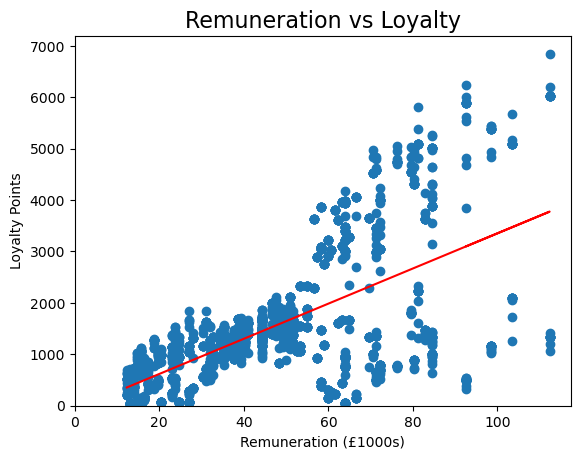

In [19]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set title.
plt.title('Remuneration vs Loyalty', fontsize=16)

# Add axis labels.
plt.xlabel('Remuneration (£1000s)')
plt.ylabel('Loyalty Points')

# Save the plot.
plt.savefig('plot2.png')

# View the plot.
plt.show()

### 5c) age vs loyalty

In [20]:
# Independent variable.
x = reviews['age'] 

# Dependent variable.
y = reviews['loyalty_points'] 

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 21 Jul 2023   Prob (F-statistic):             0.0577
Time:                        16:59:33   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * x

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

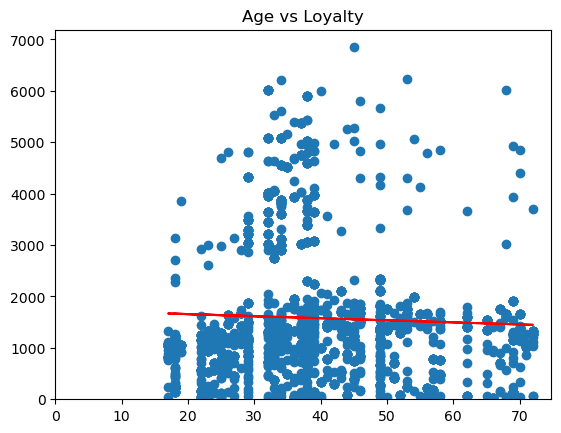

In [23]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set title.
plt.title('Age vs Loyalty')

# Save the plot.
plt.savefig('plot3.png')

# View the plot.
plt.show()

## 6. Observations and insights

***The strongest correlation with the loyalty point dependent variable was found when assigning the spending score as the independent variable. It is possible that the reason for this is because both metrics rely on purchase behavior. Loyalty points are determined by the point value of the purchase, while the spending score is assigned to customers based on their spending nature. 
The R-squared value for this regression is 0.452, indicating that 45% of the observed variation can be explained by the inputs. The p-value = 0.00 suggests that the coefficient is statistically significant and can be used to make inferences about the relationship between the variables. The 95% confidence interval for x ranges from 31.464 to 34.659. The scatterplot indicates a positive correlation between spending and loyalty points that weakens beyond a score of 60. 
A similar scenario is observed for remuneration, with a statistically significant linear relationship between the two variables for remuneration below £60,000. Although the linear relationship is weaker than the precedent with a R-squared of 0.38 and a slightly bigger standard error (0.978 against 0.814 with the spending score).***
 
***In contrast, the R-squared value for the regression between age and loyalty points suggests that there is almost any relationship within age and loyalty point. The p-value of 0.0577 indicate weak evidence against the null hypothesis that all regression coefficients are equal to zero. The values in the scatterplot don't follow any pattern and are randomly shattered, that suggest that there is almost any linear relationship between loyalty point score and the independent variable 'age'.***

# 

# Clustering with *k*-means using Python

Investigating relationship between spending score and remuneration. Identifying groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('clean_reviews.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [26]:
# Drop unnecessary columns.
df2 = df2[['remuneration', 'spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [27]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [28]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

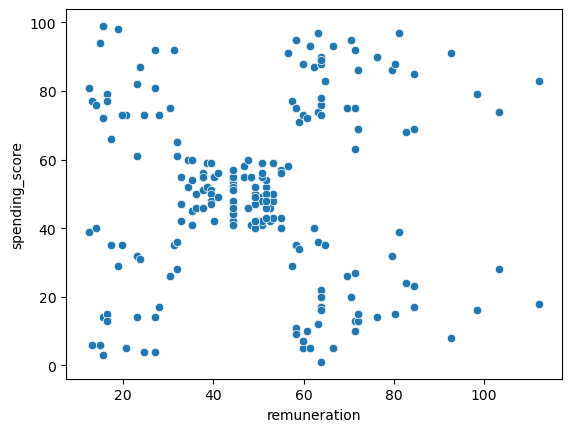

In [29]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

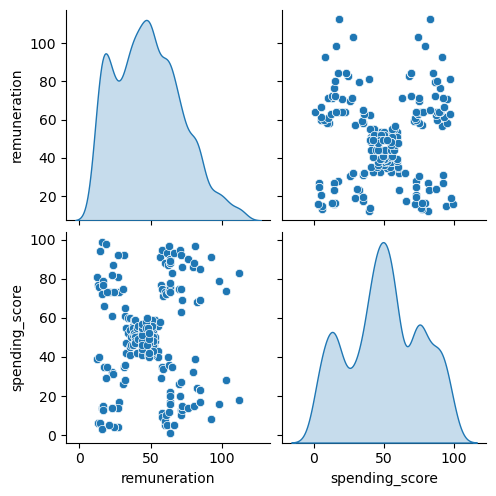

In [30]:
# Create a pairplot with Seaborn.
sns.pairplot(df2,
            diag_kind= 'kde');

## 3. Elbow and silhoutte methods

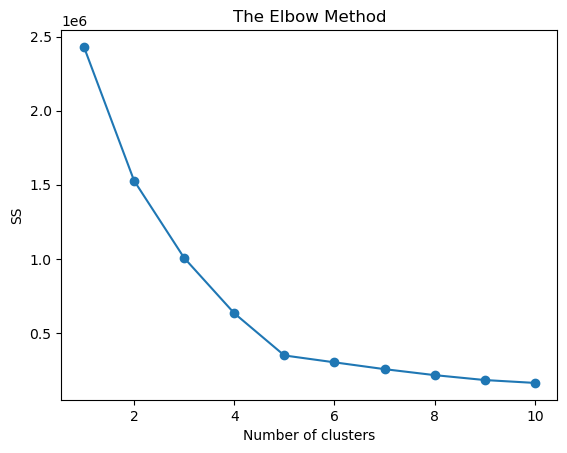

In [31]:
# Determine the number of clusters: Elbow method.

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

> Here the 'elbow' suggest k = 5 

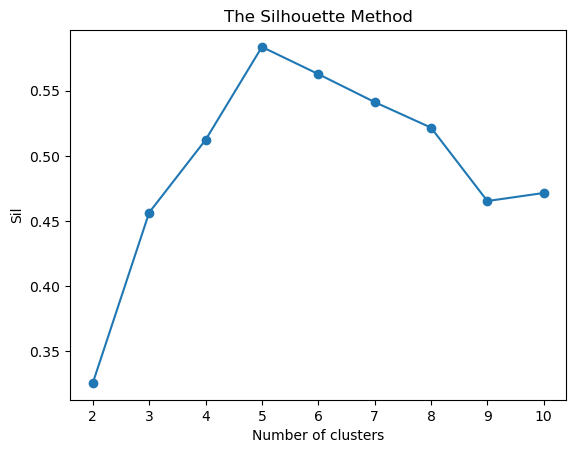

In [32]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

> Also with the silhuette method the 5 clusters are clearly suggested with the spike of the line.

## 4. Evaluate k-means model at different values of *k*

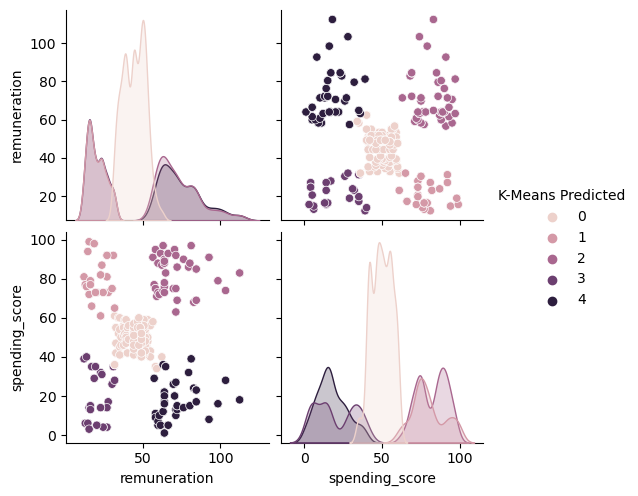

In [33]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Save plot.
plt.savefig('plot4.png');

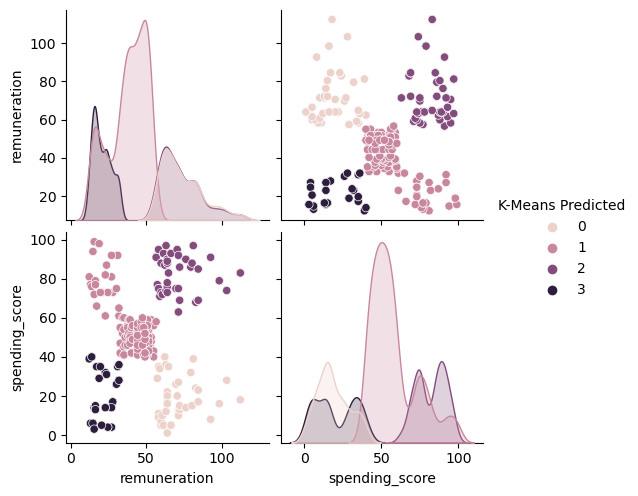

In [34]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde');

## 5. Fit final model and justify your choice

In [35]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

In [36]:
# Check the number of observations per predicted class.
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [37]:
# View the DataFrame.
df2.head()

,remuneration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3


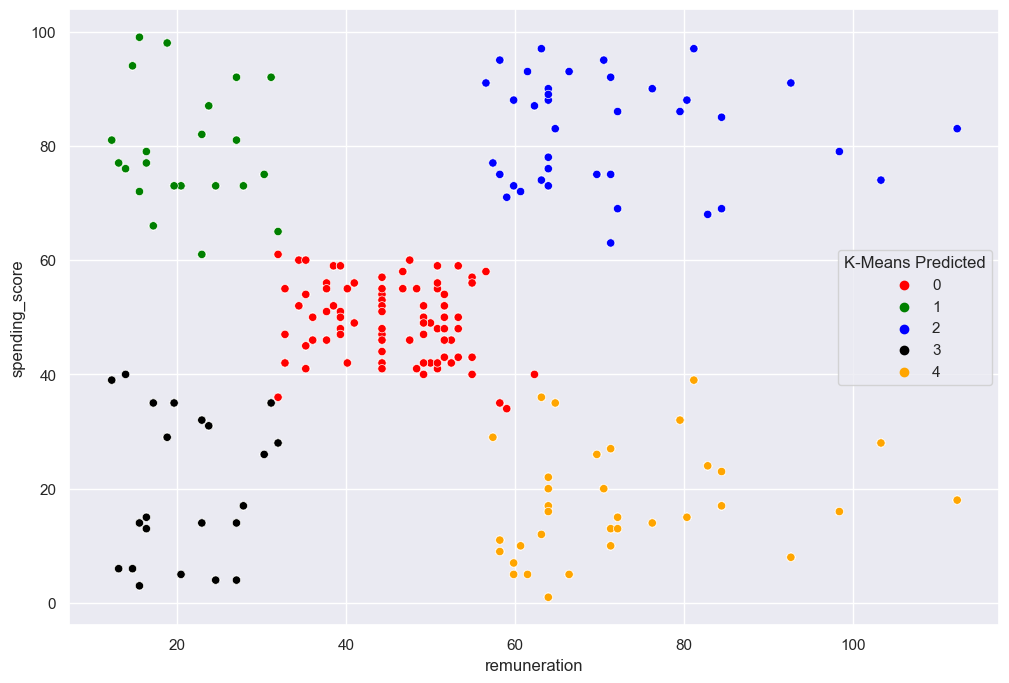

In [38]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange']);


## 7. Discuss: Insights and observations

***Since the initial scatterplot, five clusters were visible at first glance, with a clear distribution at the center and corners of the grid. Both the Elbow and Silhouette methods confirmed this initial impression. While most of the values are in the central part of the plot in cluster 0, the values are fairly distributed in the other four clusters in the corners. 
It is possible to see that the group of remuneration classes under 30k and over 60k are almost equally split into two clusters. One half has a higher spending score than the average, while the other half has a lower spending score than the average. Knowing this values of customers allow us to assign them a cluster and build a model more accurate for the prediction of loyalty point.***

# 

# NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [39]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lxmas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lxmas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Load the data set as df3.
df3 = pd.read_csv('clean_reviews.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [41]:
# Explore data set.
df3.shape

(2000, 9)

In [42]:
# Keep necessary columns. Drop unnecessary columns.
df3  = df3[['review','summary']]

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [43]:
# Determine if there are any missing values.
df3[['review', 'summary']].isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [44]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [45]:
# Summary: Change all to lower case and join with a space.
# Review: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [46]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [47]:
# Replace all the punctuations in review column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [48]:
# Check the number of duplicate values in the review column.
df3.review.duplicated().sum()

50

In [49]:
# Check the number of duplicate values in the summary column.
df3.summary.duplicated().sum()

649

In [50]:
# Drop duplicates in 'summary' columns.
df_no_dup = df3.drop_duplicates(subset=['summary'])

# View DataFrame.
df_no_dup.reset_index(inplace=True)
print(df_no_dup.shape)
df_no_dup.head()


(1351, 3)


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [51]:
# Check the number of duplicate values in the review column.
df_no_dup.review.duplicated().sum()

1

In [52]:
# Check the number of duplicate values in the summary column.
df_no_dup.summary.duplicated().sum()

0

> After testing the word frequency and sentiment analysis keeping the duplicates and without them, I had similar results so that I appurated that keeping the duplicat didn't change significantly the analysis.

## 3. Tokenise and create wordclouds

In [53]:
# Create new DataFrame (copy DataFrame).
df4 = df_no_dup.copy()

# View DataFrame.
df4

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1346,1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1347,1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1348,1992,great game to keep the mind active we play it ...,great game to keep the mind active
1349,1994,we are retired and find this a great way to st...,a great mind game


In [54]:
# String all reviews together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + df4['review'][i]

In [55]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

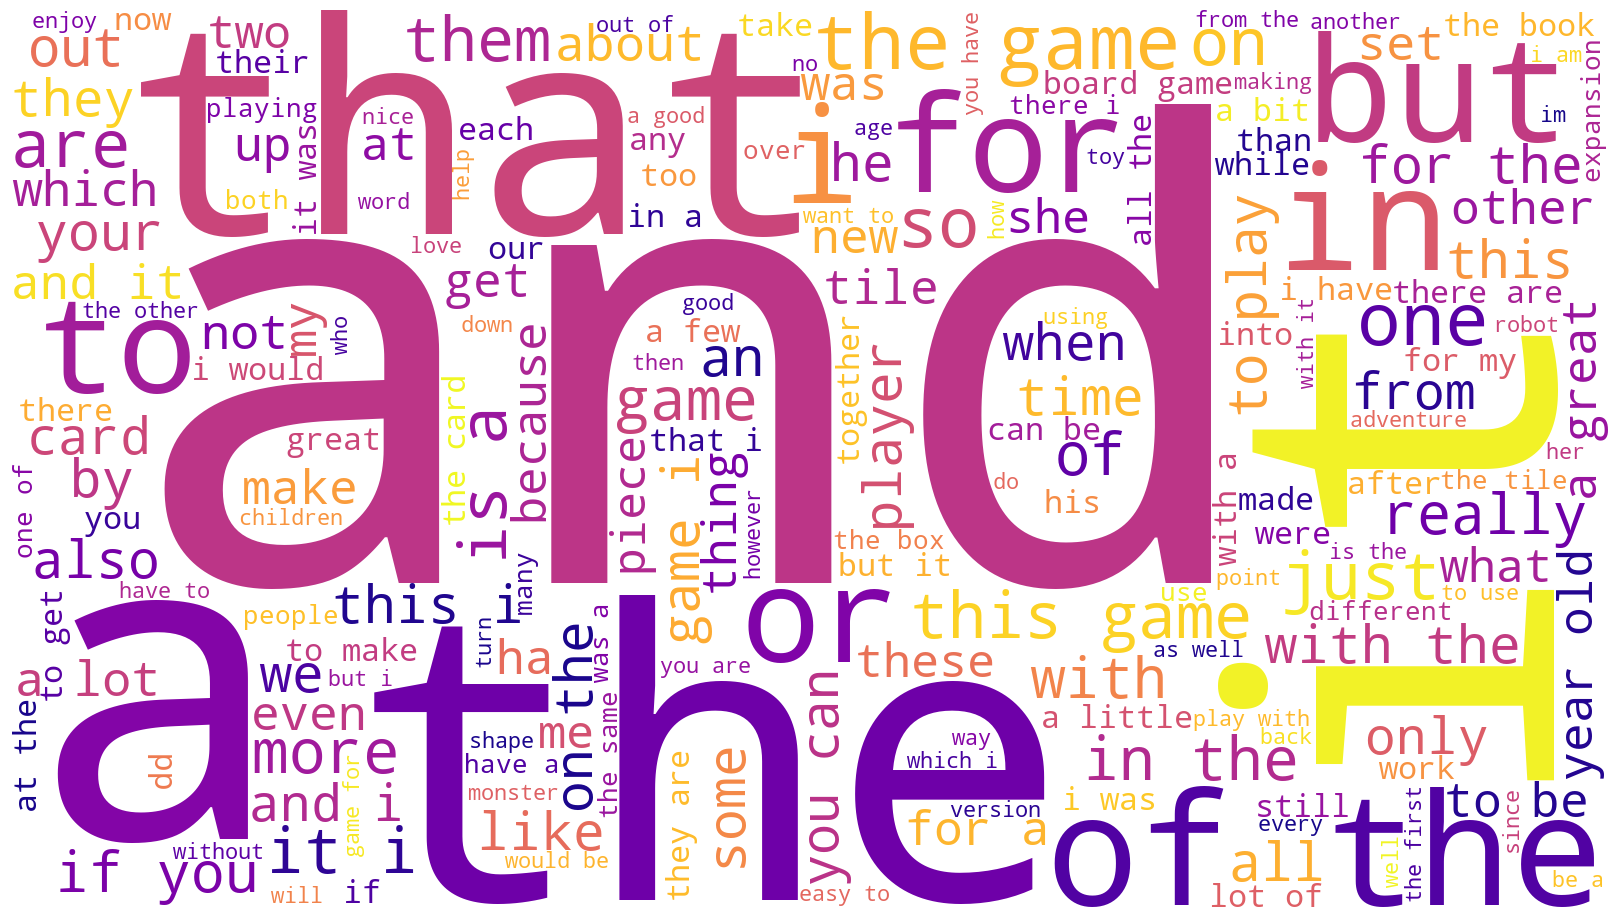

In [56]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [57]:
# String all summaries together in a single variable.
# Create an empty string variable.
all_summaries = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_summaries = all_summaries + df4['summary'][i]

In [58]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summaries) 

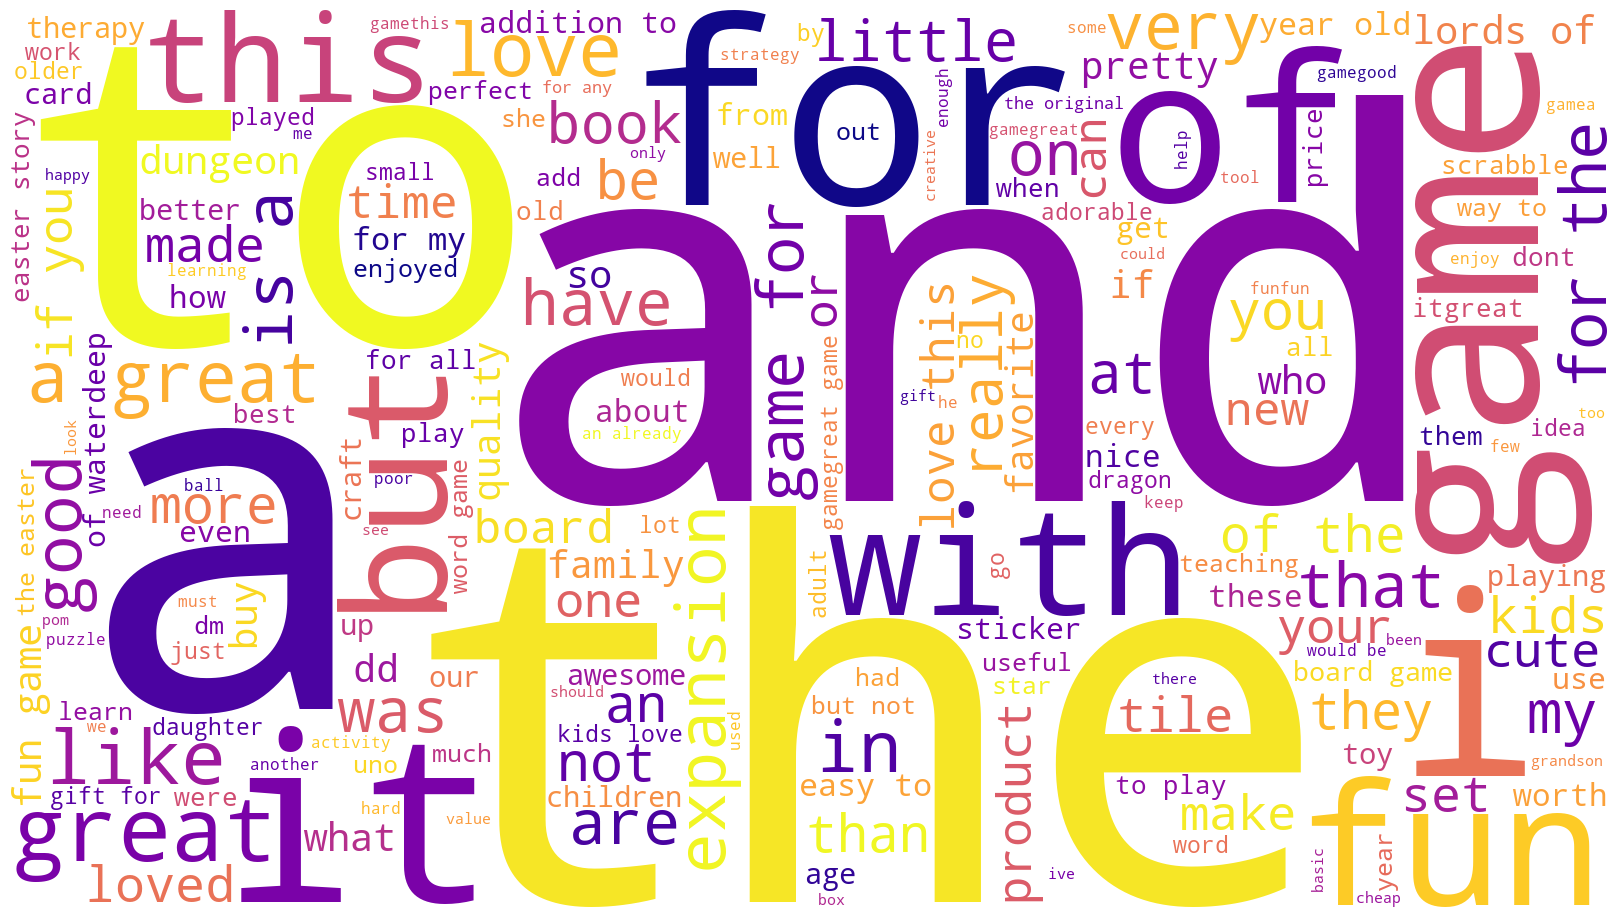

In [59]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [60]:
# Determine the frequency distribution in 'review'.

# # Tokenise the words.
df4['token_rev'] = df4['review'].apply(word_tokenize)

# tokenize the values in the 'tokens_rev' column
all_tokens = [token for row in df4['token_rev'] for token in row]

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

### 4b) Remove alphanumeric characters and stopwords

In [61]:
# Delete all the alphanum.
tokens = [word for word in all_tokens if word.isalnum()]

In [62]:
# Remove all the stopwords.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Adding the word 'game' as a stop word because doesn't add any information about sentiment
english_stopwords.add('game')

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [63]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(tokens2_string) 

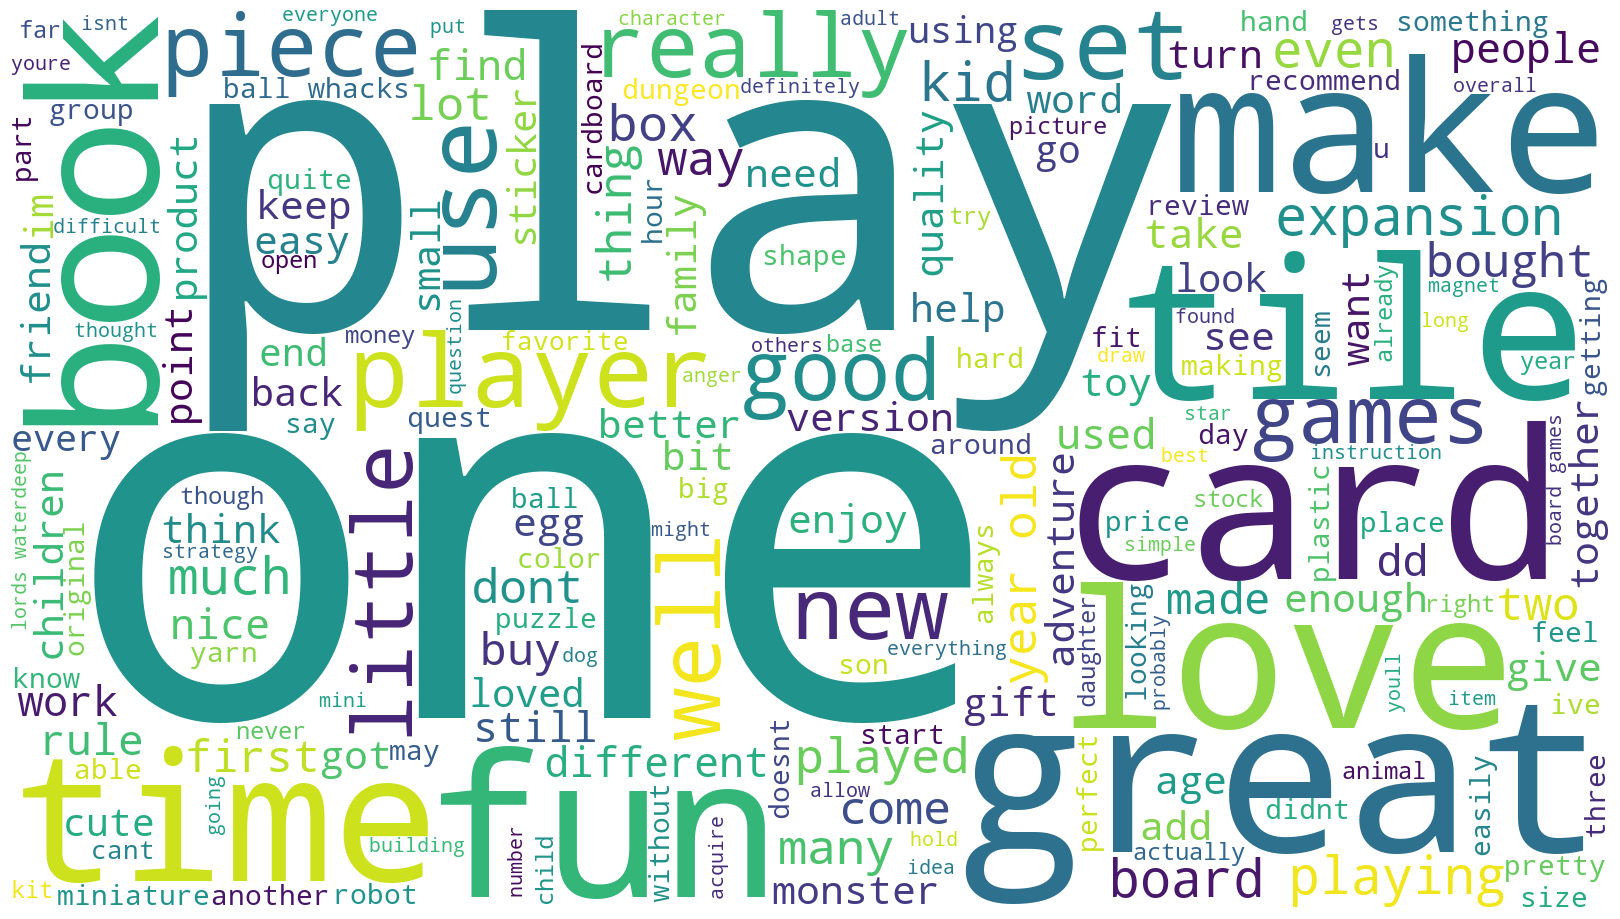

In [64]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

# Save plot.
plt.savefig('plot5.png')

plt.show()

### 4d) Identify 15 most common words and polarity

In [65]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, 'book': 259, ...})

In [66]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280
really,278


### Find polarity score for single words

In [67]:
# Generate a DataFrame from Counter with word not set as a index.
all_words= pd.DataFrame(Counter(tokens2).most_common(),
                      columns=['Word', 'Frequency'])

# Preview data.

all_words

,Word,Frequency
0,one,475
1,play,442
2,fun,407
3,great,392
4,like,373
...,...,...
7067,dictionaries,1
7068,active,1
7069,motherinlaw,1
7070,strictly,1


In [68]:
# Give polarity score
# Function to extract polarity score.
def generate_polarity(word):
    '''Extract polarity score (-1 to +1) for each word'''
    return TextBlob(word).sentiment[0]

# Determine polarity of review column. 
# Populate a new column with polarity scores for each comment.
all_words['polarity'] = all_words['Word'].apply(generate_polarity)

# View output.
all_words

,Word,Frequency,polarity
0,one,475,0.000000
1,play,442,0.000000
2,fun,407,0.300000
3,great,392,0.800000
4,like,373,0.000000
...,...,...,...
7067,dictionaries,1,0.000000
7068,active,1,-0.133333
7069,motherinlaw,1,0.000000
7070,strictly,1,0.000000


In [69]:
# Create a list of the most frequent words with negative sentiment
frequent_negative = all_words[all_words['polarity'] < -0.5].sort_values(by=['Frequency'], ascending=[False])

# View first 20 words
frequent_negative.head(20)

,Word,Frequency,polarity
87,anger,83,-0.700000
185,base,50,-0.800000
298,disappointed,34,-0.750000
401,bad,26,-0.700000
508,boring,21,-1.000000
758,disappointing,13,-0.600000
951,crazy,10,-0.600000
986,terrible,9,-1.000000
1215,frustrated,7,-0.700000
1298,casual,7,-0.500000


In [70]:
# Create a list of the most frequent words with positive sentiment
frequent_positive = all_words[all_words['polarity'] > 0.5].sort_values(by=['Frequency'], ascending=[False])

# View first 20 words
frequent_positive.head(20)

,Word,Frequency,polarity
3,great,392,0.80
16,good,228,0.70
59,nice,106,0.60
105,loved,73,0.70
110,best,70,1.00
158,perfect,56,1.00
227,excellent,42,1.00
229,awesome,42,1.00
305,beautiful,33,0.85
333,happy,30,0.80


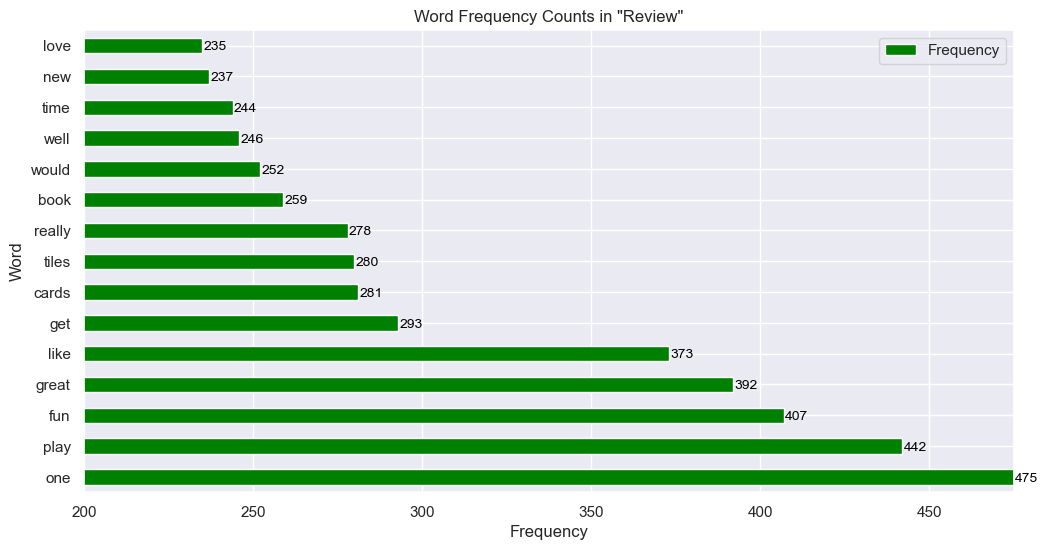

In [71]:
# create a horizontal bar chart

fig, ax = plt.subplots(figsize=(12, 6))
counts.plot.barh(ax=ax, color='green')
ax.set_title('Word Frequency Counts in "Review"')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')

# Convert counts to a numpy array and find the maximum value
max_frequency = counts.values.max()

# Set the lower limit of x-axis to 200
ax.set_xlim(200, max_frequency)

# Draw the bar labels
for i in ax.patches:
    ax.text(i.get_width() + 0.41, i.get_y() + 0.1, str(round(i.get_width(), 2)),
            fontsize=10, color='black')

# Save plot.
plt.savefig('plot6.png')

plt.show()

### Polarity score of the most frerquent words

In [72]:
# Define a function to calculate the sentiment polarity of each word
def calculate_word_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Example usage
top_words = [word for word, freq in fdist1.most_common(15)]

sentiment_scores = []
for word in top_words:
    score = calculate_word_polarity(word)
    sentiment_scores.append(score)
    print(f"{word}: {score}")

one: 0.0
play: 0.0
fun: 0.3
great: 0.8
like: 0.0
get: 0.0
cards: 0.0
tiles: 0.0
really: 0.2
book: 0.0
would: 0.0
well: 0.0
time: 0.0
new: 0.13636363636363635
love: 0.5


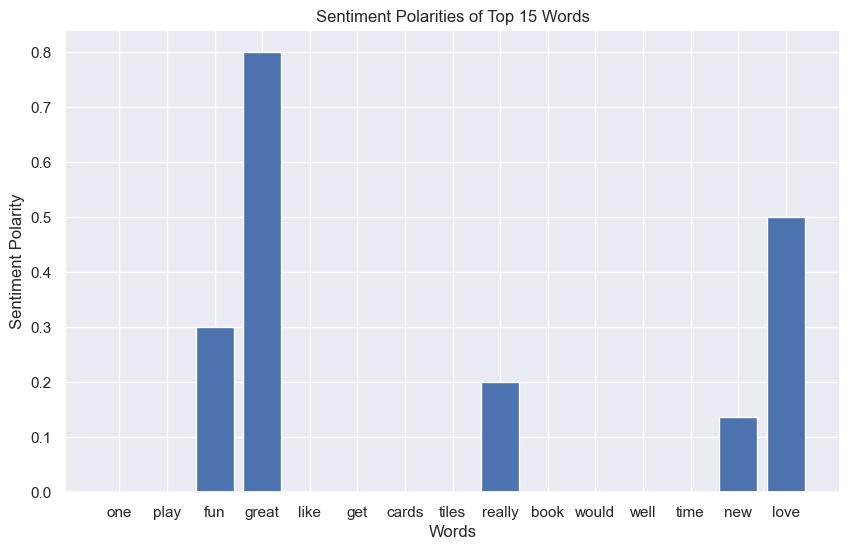

In [73]:
# Plot the barplot of sentiment polarities.
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_words, sentiment_scores)
ax.set_title("Sentiment Polarities of Top 15 Words")
ax.set_xlabel("Words")
ax.set_ylabel("Sentiment Polarity")

# Save plot.
plt.savefig('plot7.png')

plt.show()

### Calculation of polarity score usig VADER to compare with TextBlob results

In [74]:
# Calculate the sentiment polarity of each word with VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

top_words = [word for word, freq in fdist1.most_common(15)]

sentiment_scores = []
for word in top_words:
    scores = analyzer.polarity_scores(word)
    sentiment_scores.append(scores['compound'])
    print(f"{word}: {scores['compound']}")

one: 0.0
play: 0.34
fun: 0.5106
great: 0.6249
like: 0.3612
get: 0.0
cards: 0.0
tiles: 0.0
really: 0.0
book: 0.0
would: 0.0
well: 0.2732
time: 0.0
new: 0.0
love: 0.6369


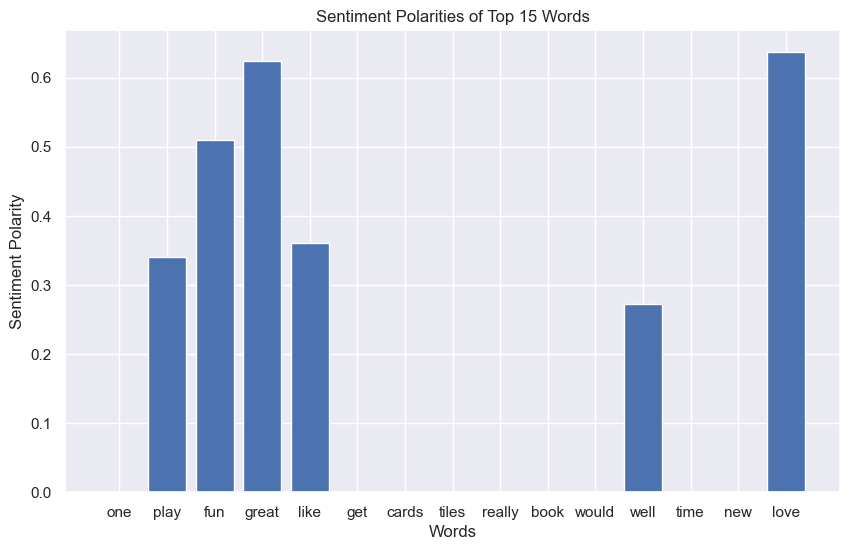

In [75]:
# Plot the barplot of sentiment polarities.
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_words, sentiment_scores)
ax.set_title("Sentiment Polarities of Top 15 Words")
ax.set_xlabel("Words")
ax.set_ylabel("Sentiment Polarity")
plt.show()

> The polarity scored assigne with TextBlob seems more accurate, because is not including word such 'play' or 'well' as positive, which they are neutral in this context. 

### Determine frerquency distribution in 'summary'

In [76]:
# Determine the frequency distribution in 'summary'.

# Tokenise the words.
df4['tokens_sum'] = df4['summary'].apply(word_tokenize)

# tokenize the values in the 'tokens' column
all_tokens = [token for row in df4['tokens_sum'] for token in row]

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [77]:
# Delete all the alphanum.
tokens = [word for word in all_tokens if word.isalnum()]

In [78]:
# Remove all the stopwords.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Adding the word game as doesn't add any information
english_stopwords.add('game')

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [79]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(tokens2_string) 

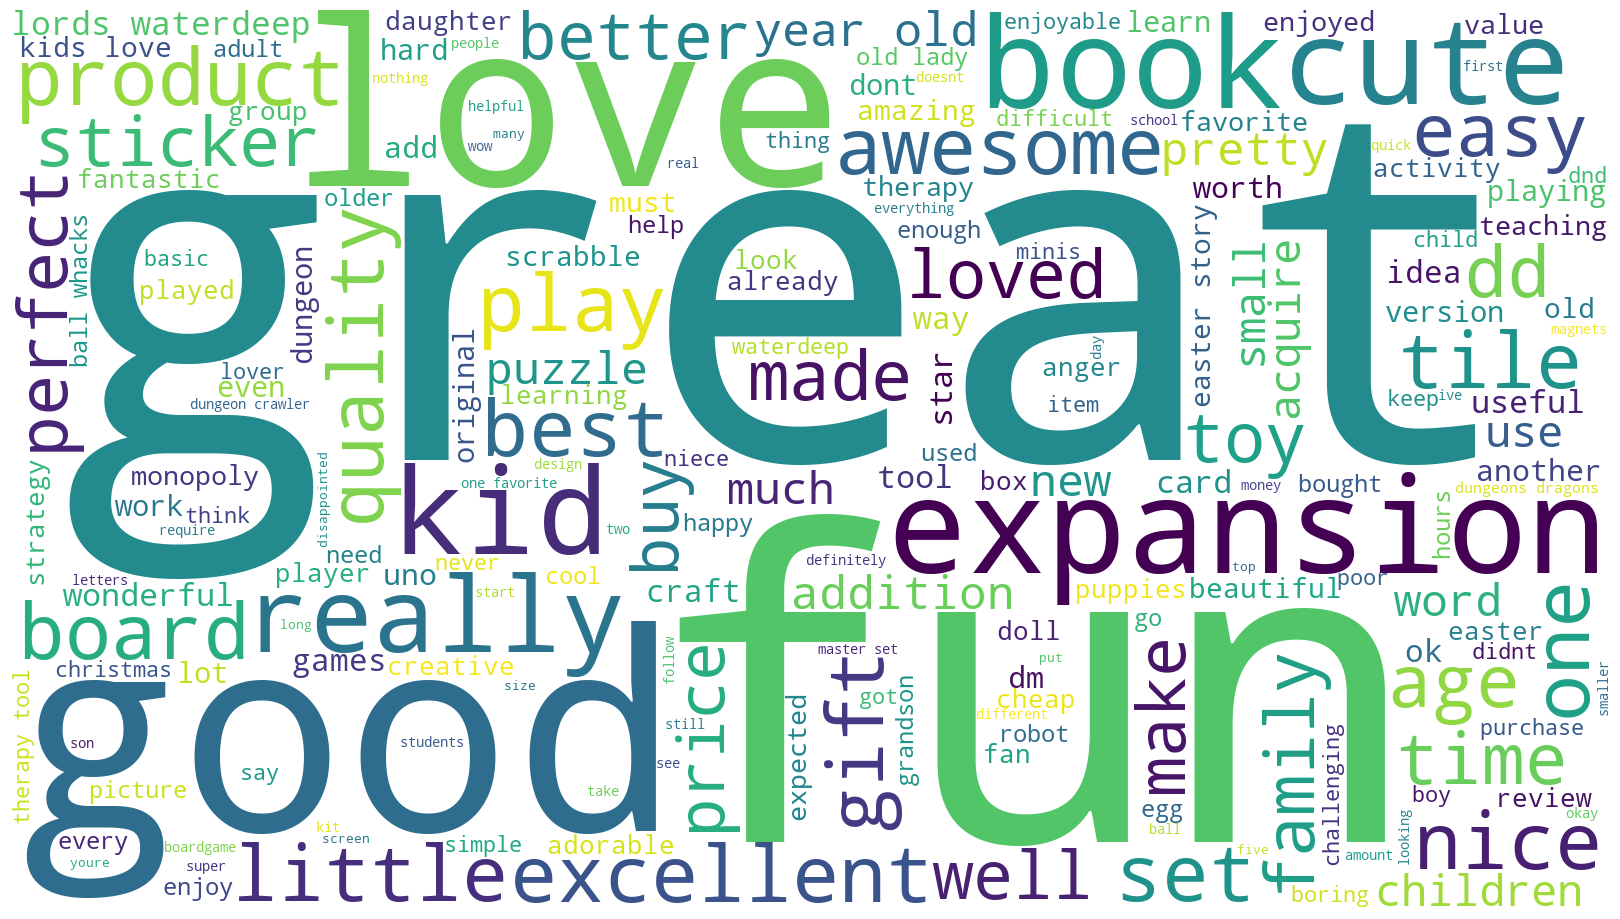

In [80]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [81]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist2 = FreqDist(tokens2)

# Preview the data.
fdist2

FreqDist({'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, 'old': 34, ...})

In [82]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42
cute,40


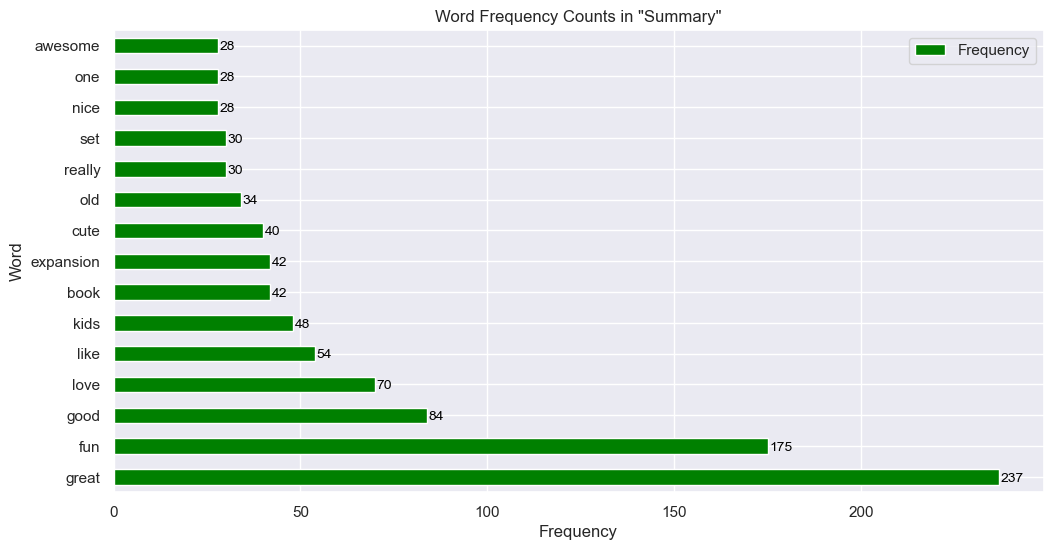

In [83]:
# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))
counts.plot.barh(ax=ax, color='green')
ax.set_title('Word Frequency Counts in "Summary"')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')


# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=10, color='black')
    
# Save plot.
plt.savefig('plot15.png')

plt.show()

In [84]:
# Define a function to calculate the sentiment polarity of each word with TextBlob
def calculate_word_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Example usage
top_words = [word for word, freq in fdist2.most_common(15)]

sentiment_scores = []
for word in top_words:
    score = calculate_word_polarity(word)
    sentiment_scores.append(score)
    print(f"{word}: {score}")

great: 0.8
fun: 0.3
good: 0.7
love: 0.5
like: 0.0
kids: 0.0
book: 0.0
expansion: 0.0
cute: 0.5
old: 0.1
really: 0.2
set: 0.0
nice: 0.6
one: 0.0
awesome: 1.0


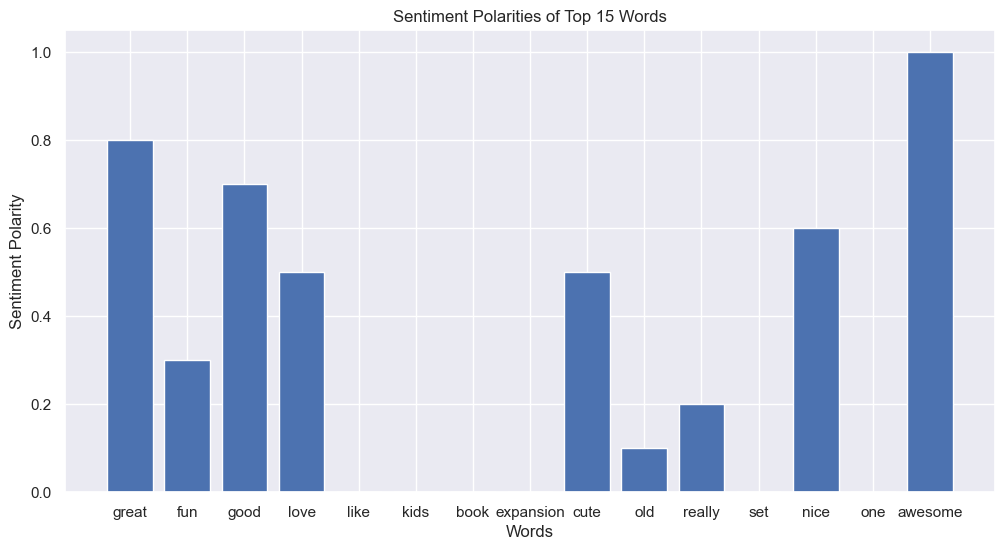

In [85]:
# Plot the barplot of sentiment polarities.
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_words, sentiment_scores)
ax.set_title("Sentiment Polarities of Top 15 Words")
ax.set_xlabel("Words")
ax.set_ylabel("Sentiment Polarity")

# Save plot.
plt.savefig('plot16.png')

plt.show()

In [86]:
# Calculate the sentiment polarity of each word with VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

top_words = [word for word, freq in fdist2.most_common(15)]

sentiment_scores = []
for word in top_words:
    scores = analyzer.polarity_scores(word)
    sentiment_scores.append(scores['compound'])
    print(f"{word}: {scores['compound']}")

great: 0.6249
fun: 0.5106
good: 0.4404
love: 0.6369
like: 0.3612
kids: 0.0
book: 0.0
expansion: 0.0
cute: 0.4588
old: 0.0
really: 0.0
set: 0.0
nice: 0.4215
one: 0.0
awesome: 0.6249


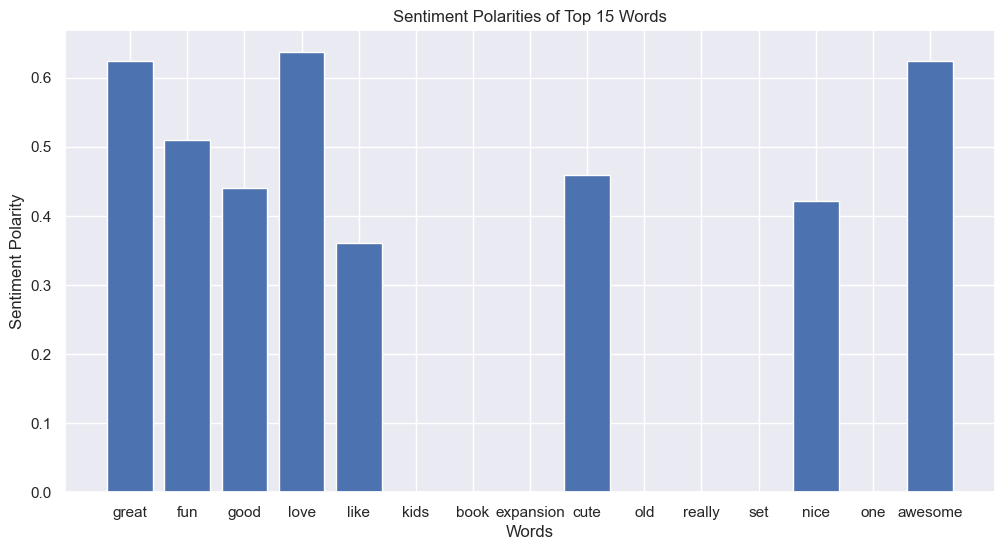

In [87]:
# Plot the barplot of sentiment polarities.
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_words, sentiment_scores)
ax.set_title("Sentiment Polarities of Top 15 Words")
ax.set_xlabel("Words")
ax.set_ylabel("Sentiment Polarity")
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [88]:
# Function to extract polarity score.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Determine polarity of review column. 
# Populate a new column with polarity scores for each comment.
df4['rev_polarity'] = df4['review'].apply(generate_polarity)

# View output.
print(df4.shape)
df4['rev_polarity']

(1351, 6)


0      -0.036111
1       0.035952
2       0.116640
3       0.578788
4      -0.316667
          ...   
1346    0.250000
1347    0.171429
1348    0.155208
1349    0.400000
1350    0.168750
Name: rev_polarity, Length: 1351, dtype: float64

In [89]:
# Function to extract subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['rev_subjectivity'] = df4['review'].apply(generate_subjectivity)

# View output.
print(df4.shape)
df4['rev_subjectivity']

(1351, 7)


0       0.486111
1       0.442976
2       0.430435
3       0.784848
4       0.316667
          ...   
1346    0.533333
1347    0.290476
1348    0.478125
1349    0.633333
1350    0.491667
Name: rev_subjectivity, Length: 1351, dtype: float64

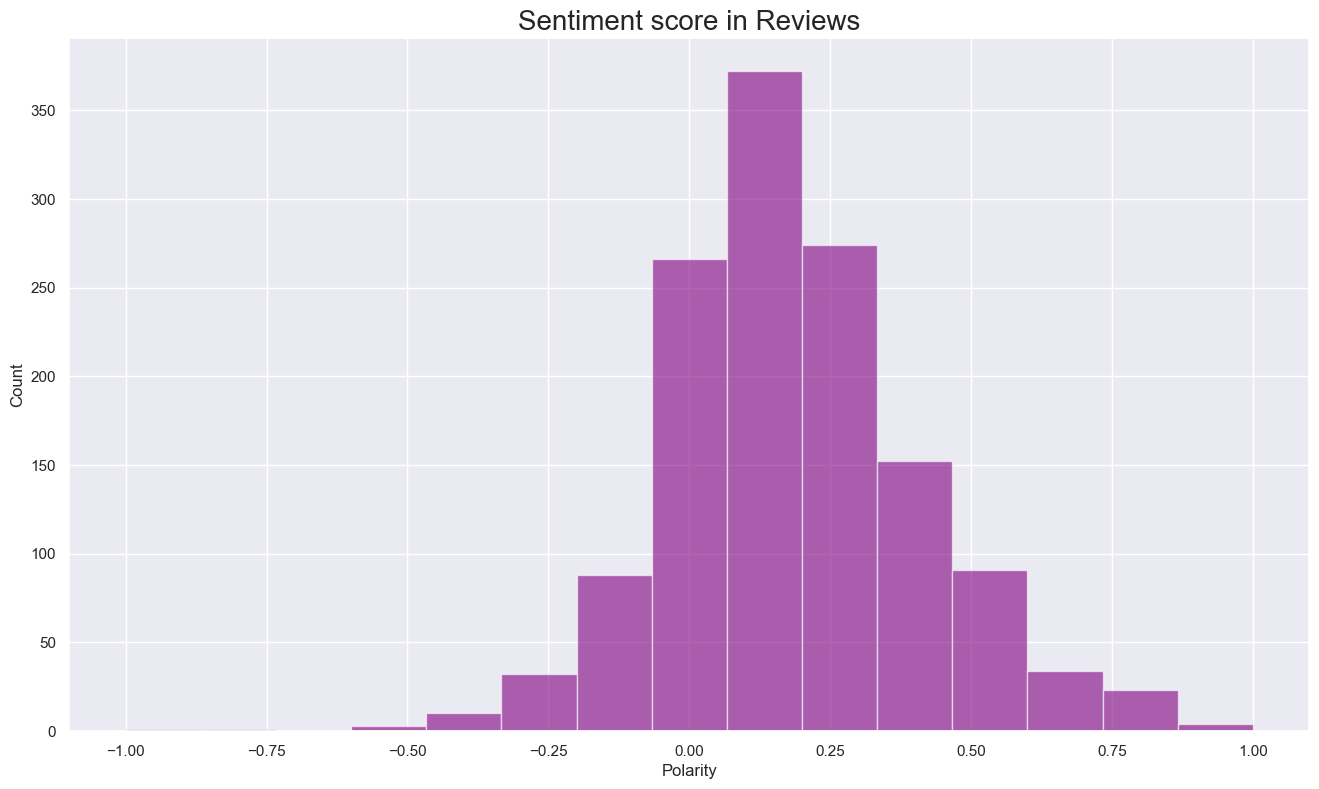

In [90]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['rev_polarity'], num_bins, facecolor='purple', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment score in Reviews', fontsize=20)

# Save plot.
plt.savefig('plot10.png')

plt.show()

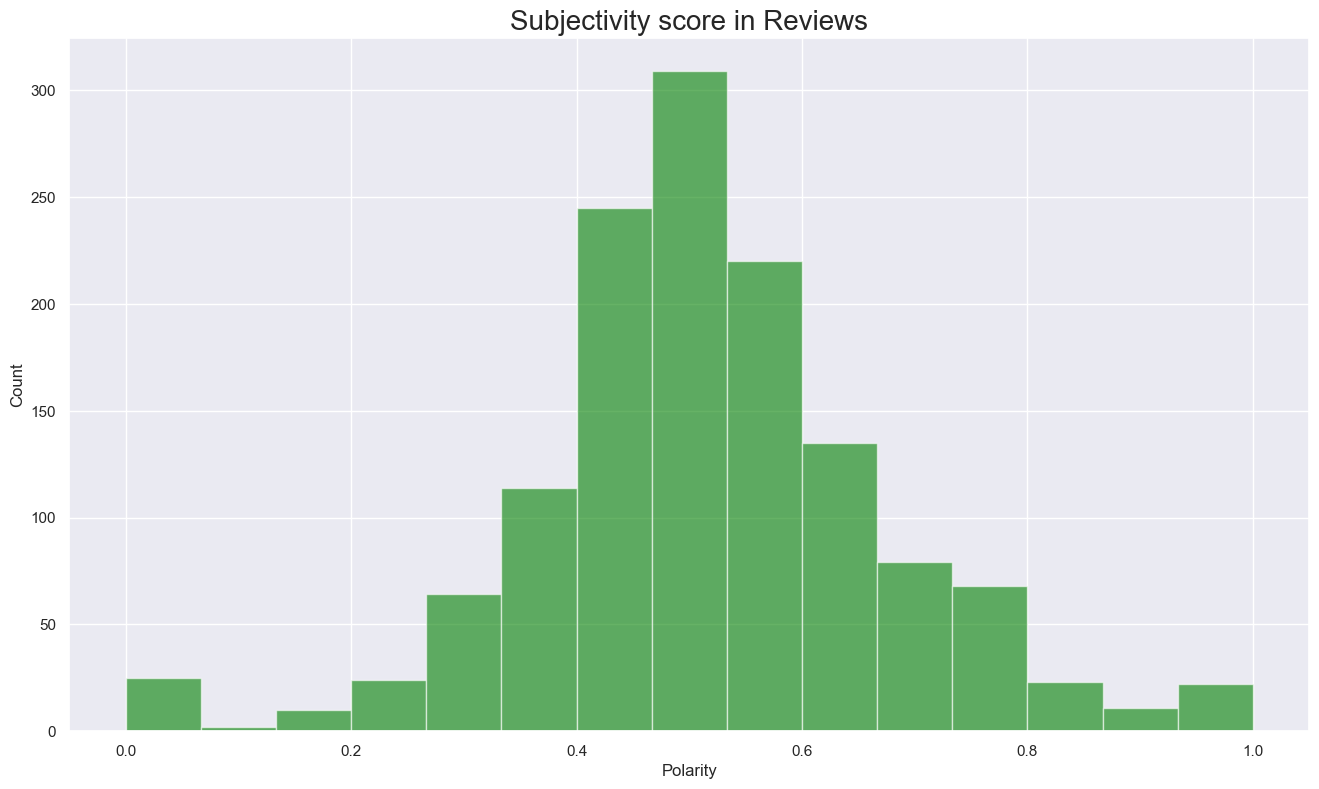

In [91]:
# Histogram of subjectivity score

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['rev_subjectivity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Subjectivity score in Reviews', fontsize=20)

# Save plot.
plt.savefig('plot11.png')

plt.show();

In [92]:
# Determine polarity of summary column. 
# Populate a new column with polarity scores for each comment.
df4['sum_polarity'] = df4['summary'].apply(generate_polarity)

# View output.
df4['sum_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: sum_polarity, dtype: float64

In [93]:
# Function to extract subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['sum_subjectivity'] = df4['summary'].apply(generate_subjectivity)

# View output.
print(df4.shape)
df4['sum_subjectivity']

(1351, 9)


0       0.500000
1       0.900000
2       0.733333
3       0.000000
4       0.000000
          ...   
1346    0.300000
1347    0.400000
1348    0.583333
1349    0.575000
1350    0.550000
Name: sum_subjectivity, Length: 1351, dtype: float64

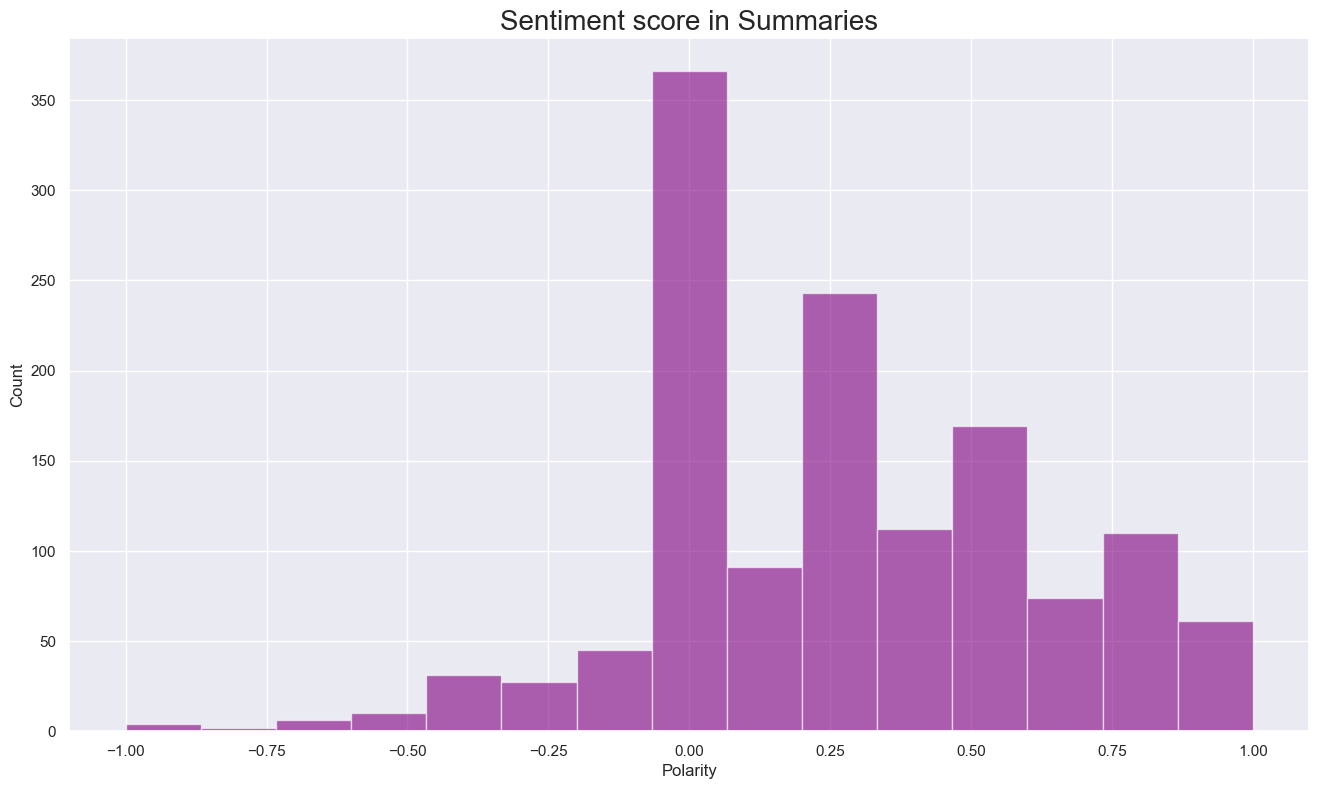

In [94]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['sum_polarity'], num_bins, facecolor='purple', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment score in Summaries', fontsize=20)

# Save plot.
plt.savefig('plot12.png')

plt.show()

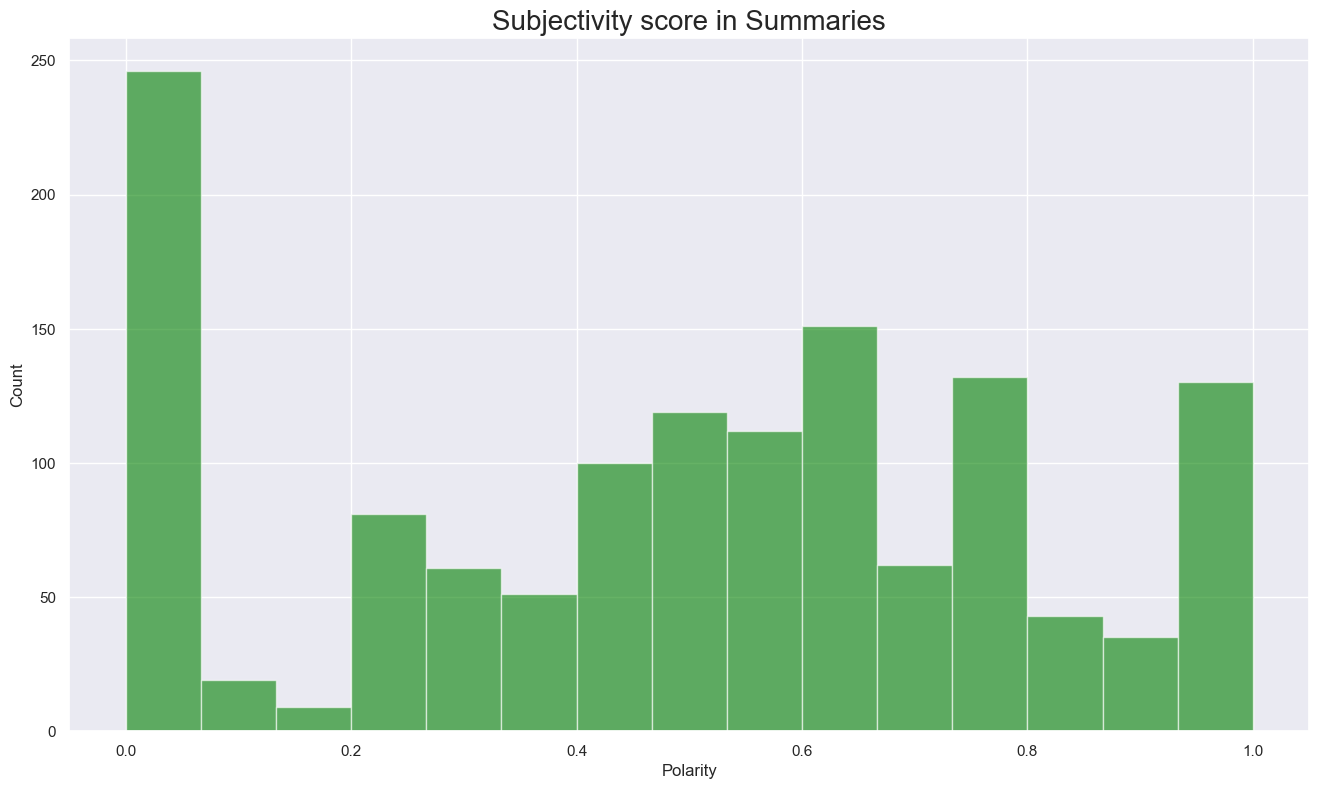

In [95]:
# Histogram of subjectivity score

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['sum_subjectivity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Subjectivity score in Summaries', fontsize=20)

# Save plot.
plt.savefig('plot13.png')

plt.show()

> The polarity score histogram of the reviews showed a positive skew, indicating that the majority of comments had a positive sentiment. Similarly, the summary column was mostly positive, but with a noticeable peak in neutral comments and a spread of negative comments up to the highest polarity score.

#

### Sentiment Analysis of reviews with VADER

In [96]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lxmas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [97]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [98]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df4['token_rev']}

In [99]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.108,0.833,0.059,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.101,0.695,0.205,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.136,0.711,0.153,-0.0045
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.490,0.510,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.203,0.797,0.000,-0.6808
...,...,...,...,...
this is a fun card game for people who like words and the artwork on the cards for each letter is absolutely beautiful try it,0.000,0.678,0.322,0.8748
fun for the family just make certain you agree on the dictionary up front it makes a big difference,0.000,0.655,0.345,0.7845
great game to keep the mind active we play it with my 87 year old motherinlaw we dont adhere strictly to the rules we sometimes help each other rearrange their letters to get higher scores everyone likes higher scores the strategy to remember is the bonus points for longest work or most words,0.000,0.721,0.279,0.9531
we are retired and find this a great way to stay alert in our spelling and vocabulary we also need to use math to keep score a great game for the brain,0.000,0.693,0.307,0.9178


In [100]:
# Get the top 5 most positive cleaned 
polarity.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
entertaining,0.0,0.000,1.000,0.4404
perfect,0.0,0.000,1.000,0.5719
great,0.0,0.000,1.000,0.6249
cute,0.0,0.000,1.000,0.4588
fun gift,0.0,0.000,1.000,0.7351
fun good service,0.0,0.139,0.861,0.7351
very cute,0.0,0.233,0.767,0.5095
its fun,0.0,0.233,0.767,0.5106
liked it,0.0,0.263,0.737,0.4215
a fun game we enjoy it a great deal,0.0,0.274,0.726,0.8910


In [101]:
# Get the top 5 most negative words.
polarity.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520
not as easy as it looks,0.325,0.675,0.000,-0.3412
we really did not enjoy this game,0.325,0.675,0.000,-0.4389
hard to put together,0.318,0.682,0.000,-0.1027
my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,0.318,0.613,0.069,-0.8674
easytouse great for anger management groups,0.314,0.339,0.347,0.1027
its ok but loses its luster quickly,0.309,0.524,0.168,-0.3291


In [102]:
# The describe function on the compound will show the distribution and moments.
polarity['compound'].describe()

count    1350.000000
mean        0.660546
std         0.424616
min        -0.991300
25%         0.599400
50%         0.834450
75%         0.930050
max         0.999600
Name: compound, dtype: float64

<AxesSubplot:>

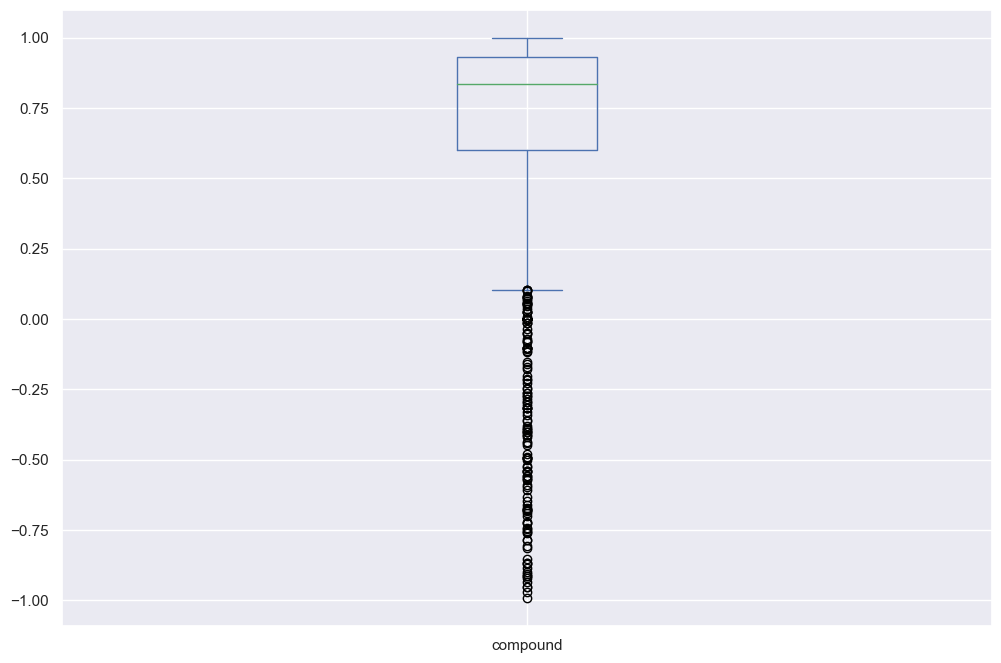

In [103]:
# Boxplot
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

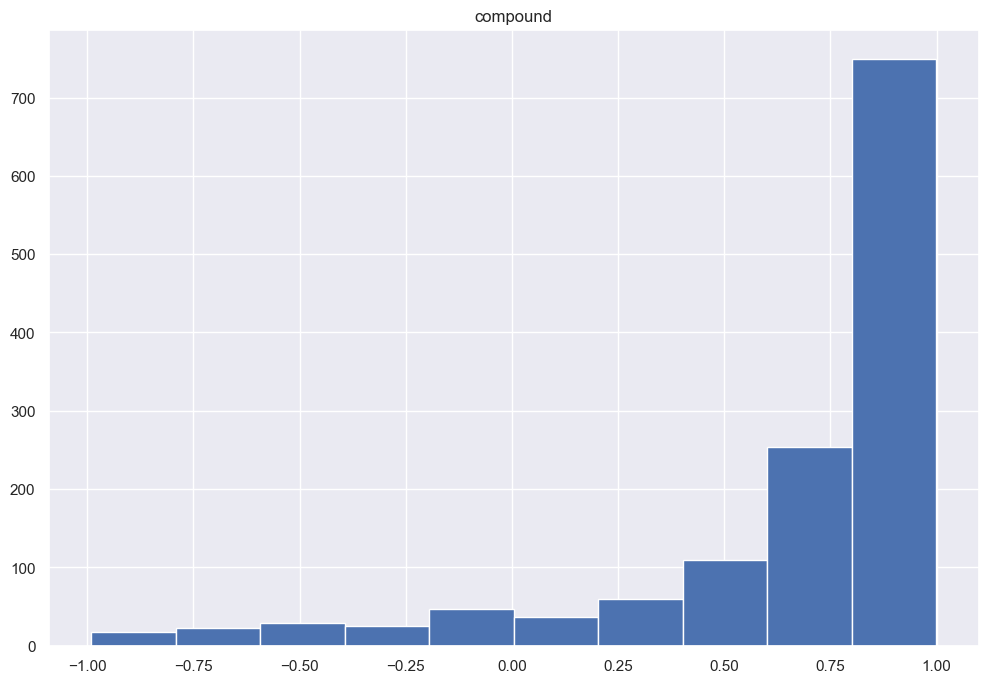

In [104]:
# Histogram.
polarity['compound'].sort_values().reset_index().hist()

> It is interesting to see at this analysis with VADER where there are not completely negative comments and a vast majority of positive comments. The mean of the compound 0.66 wich is a fair value also when compared with the precedent analysis. The list of top ten comments negative and positive looks very accurate.

#

## 6. Identify top 20 positive and negative reviews and summaries respectively (TextBlob)

In [105]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'rev_polarity')

# View output.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,index,review,summary,token_rev,tokens_sum,rev_polarity,rev_subjectivity,sum_polarity,sum_subjectivity
165,208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,"['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not']","['boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']",-1.000000,1.000000,-1.000000,1.000000
147,182,incomplete kit very disappointing,incomplete kit,"['incomplete', 'kit', 'very', 'disappointing']","['incomplete', 'kit']",-0.780000,0.910000,0.000000,0.000000
267,364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,anger control game,"['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it']","['anger', 'control', 'game']",-0.550000,0.300000,-0.550000,0.300000
90,117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,stickers,"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift']",['stickers'],-0.500000,0.900000,0.000000,0.000000
141,174,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,faulty product,"['i', 'sent', 'this', 'product', 'to', 'my', 'granddaughter', 'the', 'pompom', 'maker', 'comes', 'in', 'two', 'parts', 'and', 'is', 'supposed', 'to', 'snap', 'together', 'to', 'create', 'the', 'pompoms', 'however', 'both', 'parts', 'were', 'the', 'same', 'making', 'it', 'unusable', 'if', 'you', 'cant', 'make', 'the', 'pompoms', 'the', 'kit', 'is', 'useless', 'since', 'this', 'was', 'sent', 'as', 'a', 'gift', 'i', 'do', 'not', 'have', 'it', 'to', 'return', 'very', 'disappointed']","['faulty', 'product']",-0.491667,0.433333,0.000000,0.000000
251,347,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,frustating,"['my', '8', 'yearold', 'granddaughter', 'and', 'i', 'were', 'very', 'frustrated', 'and', 'discouraged', 'attempting', 'this', 'craft', 'it', 'is', 'definitely', 'not', 'for', 'a', 'young', 'child', 'i', 'too', 'had', 'difficulty', 'understanding', 'the', 'directions', 'we', 'were', 'very', 'disappointed']",['frustating'],-0.446250,0.533750,0.000000,0.000000
382,538,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,hmmm,"['i', 'purchased', 'this', 'on', 'the', 'recommendation', 'of', 'two', 'therapists', 'working', 'with', 'my', 'adopted', 'children', 'the', 'children', 'found', 'it', 'boring', 'and', 'put', 'it', 'down', 'half', 'way', 'through']",['hmmm'],-0.440741,0.485185,0.000000,0.000000
312,437,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,this game although it appears to be like uno and have an

In [106]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment2 = df4.nsmallest(20, 'sum_polarity')

# Eliminate unnecessary columns.
negative_sentiment2 = negative_sentiment2[['summary', 'sum_polarity']]

# View output.
negative_sentiment2

,summary,sum_polarity
17,the worst value ive ever seen,-1.000000
165,boring unless you are a craft person which i am,-1.000000
588,boring,-1.000000
838,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
116,disappointed,-0.750000
266,promotes anger instead of teaching calming met...,-0.700000
635,too bad this is not what i was expecting,-0.700000
638,bad qualityall made of paper,-0.700000
144,at age 31 i found these very difficult to make,-0.650000


In [107]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'rev_polarity')

# View output.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '600px'})

,index,review,summary,token_rev,tokens_sum,rev_polarity,rev_subjectivity,sum_polarity,sum_subjectivity
564,790,perfect,aquire game,['perfect'],"['aquire', 'game']",1.000000,1.000000,-0.400000,0.400000
1082,1550,my daughter loves her stickers awesome seller thank you,awesome seller thank you,"['my', 'daughter', 'loves', 'her', 'stickers', 'awesome', 'seller', 'thank', 'you']","['awesome', 'seller', 'thank', 'you']",1.000000,1.000000,1.000000,1.000000
1336,1967,perfect for tutoring my grandson in spelling,tutoring,"['perfect', 'for', 'tutoring', 'my', 'grandson', 'in', 'spelling']",['tutoring'],1.000000,1.000000,0.000000,0.000000
891,1245,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,excellent tile set,"['the', 'best', 'part', 'i', 'see', 'is', 'the', 'box', 'what', 'a', 'wonderfully', 'diverse', 'and', 'rounded', 'set', 'for', 'the', 'cost', 'i', 'am', 'so', 'happy', 'and', 'as', 'the', 'dm', 'you', 'know', 'that', 'if', 'i', 'am', 'happy', 'my', 'players', 'are', 'happy']","['excellent', 'tile', 'set']",0.880000,0.860000,1.000000,1.000000
498,703,great quality very cute and perfect for my toddler,great quality very cute and perfect for my toddler,"['great', 'quality', 'very', 'cute', 'and', 'perfect', 'for', 'my', 'toddler']","['great', 'quality', 'very', 'cute', 'and', 'perfect', 'for', 'my', 'toddler']",0.816667,0.916667,0.816667,0.916667
31,36,the pictures are great ive done one and gave it to a friend of mine who likes dragons,the pictures are great ive done one and gave it to a,"['the', 'pictures', 'are', 'great', 'ive', 'done', 'one', 'and', 'gave', 'it', 'to', 'a', 'friend', 'of', 'mine', 'who', 'likes', 'dragons']","['the', 'pictures', 'are', 'great', 'ive', 'done', 'one', 'and', 'gave', 'it', 'to', 'a']",0.800000,0.750000,0.800000,0.750000
336,474,great seller happy with my purchase 5 starrrr,great for kids,"['great', 'seller', 'happy', 'with', 'my', 'purchase', '5', 'starrrr']","['great', 'for', 'kids']",0.800000,0.875000,0.800000,0.750000
439,620,great easter gift for kids,great easter gift for kids,"['great', 'easter', 'gift', 'for', 'kids']","['great', 'easter', 'gift', 'for', 'kids']",0.800000,0.750000,0.800000,0.750000
491,685,these are great,cute letters,"['these', 'are', 'great']","['cute', 'letters']",0.800000,0.750000,0.500000,1.000000
575,804,great,great,['great'],['great'],0.800000,0.750000,0.800000,0.750000


In [108]:
# Top 20 positive summaries.
positive_sentiment2 = df4.nlargest(20, 'sum_polarity')

# Eliminate unnecessary columns.
positive_sentiment2 = positive_sentiment2[['summary', 'sum_polarity']]

# View output.
positive_sentiment2.style.set_properties(subset=['summary'], **{'width': '600px'})

,summary,sum_polarity
5,best gm screen ever,1.000000
23,wonderful designs,1.000000
27,perfect,1.000000
61,theyre the perfect size to keep in the car or a diaper,1.000000
107,perfect for preschooler,1.000000
112,awesome sticker activity for the price,1.000000
132,awesome book,1.000000
133,he was very happy with his gift,1.000000
150,awesome,1.000000
166,awesome and welldesigned for 9 year olds,1.000000


## 7. Discuss: Insights and observations

***The sentiment anaysis revealed that there a vast majority of positive reviews. Analysing the most frequent work and they polarity score we found some features that can be highlighted in future marketing campign. The word 'cards', 'tiles' and 'book' are the most used so probably are the items that cause more engagement in the reviews. There are some imprecision to consider in negative reviews the word 'anger' refear to the topic of a game and are positive reviews. Other problem of contex is with 'not the best quality', considered positive.***